# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
!wget  -O 'x.npz' -q https://www.dropbox.com/scl/fi/7myi3e0v0rmm9ttvourwm/x.npz?rlkey=doqsfk3kd665zml4kym64sl4i&dl=0
!wget  -O 'y.npy' -q https://www.dropbox.com/scl/fi/9uhk6dtlh5dcwhjxu6pp1/y.npy?rlkey=zcct9jfjev3aa6chqof6veve4&dl=0

In [3]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [5]:
!wget  -O 'boosting.py' -q https://www.dropbox.com/scl/fi/e8fq1ffc3w96uy62mtucg/boosting.py?rlkey=m4s0u9hz1iha5fcfvhgk84yoc&dl=0

In [6]:
%load_ext autoreload

In [7]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [8]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 2.01 s, sys: 34.3 ms, total: 2.04 s
Wall time: 5.13 s
Train ROC-AUC 0.9899
Valid ROC-AUC 0.9136
Test ROC-AUC 0.9112


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

<Axes: xlabel='depth', ylabel='value'>

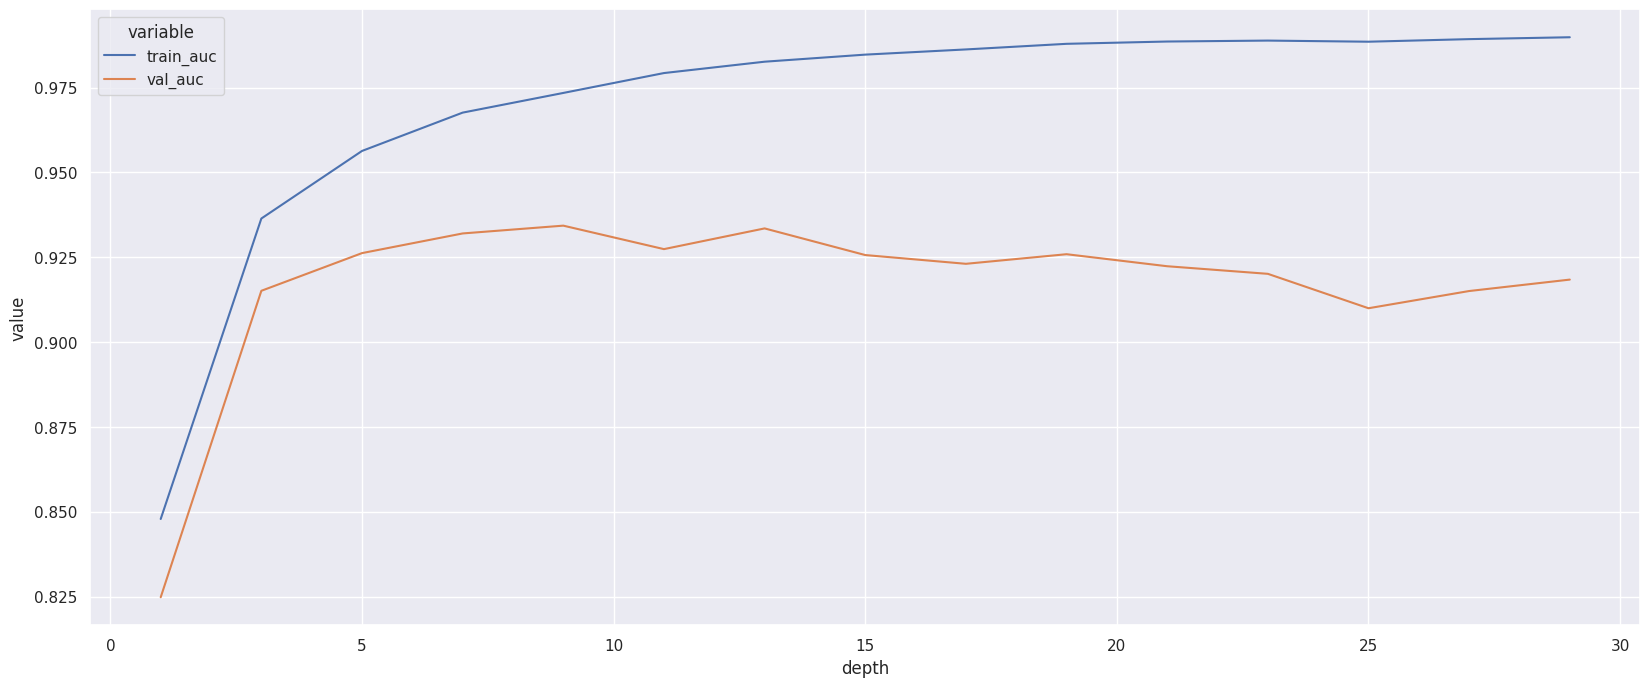

In [9]:
results = {}
depths_result = []

depths = range(1, 30, 2)

# YOUR CODE:
for max_depth in depths:
    boosting = Boosting(base_model_params={'max_depth': max_depth}, plot=False)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    train_auc = boosting.score(x_train, y_train)
    val_auc = boosting.score(x_valid, y_valid)
    depths_result.append({'depth': max_depth, 'train_auc': train_auc, 'val_auc': val_auc})

sns.set(rc={'figure.figsize': (20, 8)})
sns.lineplot(x='depth', y='value', hue='variable', data=pd.melt(pd.DataFrame(depths_result), ['depth']))

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

`### ваше решение тут ###`

Лучшее качество у моделей с глубиной 5-7. Если брать больше, то видимо базовая модель становится слишком сложной и начинает переобучаться (train_auc все время увеличивается, а val_auc уменьшается).

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [10]:
# YOUR CODE:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


Прикольная [статья](https://habr.com/ru/companies/rosbank/articles/747816/) с Хабра про подбор гиперпараметров градиентного бустинга

In [11]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 1, 100)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1)
    max_depth = trial.suggest_int('max_depth', 1, 30, step=2)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 50)
    subsample = trial.suggest_float('subsample', 0.0001, 1.0)

    boosting = Boosting(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
        base_model_params={'max_depth': max_depth,
                           'min_samples_split': min_samples_split,
                           'min_samples_leaf': min_samples_leaf
                           }
    )
    boosting.fit(x_train, y_train, x_valid, y_valid)

    valid_auc = boosting.score(x_valid, y_valid)

    return valid_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Best trial:')
trial = study.best_trial
params = trial.params

print('Value: {}'.format(trial.value))
print('Params: {}'.format(trial.params))

[I 2023-12-24 08:16:37,253] A new study created in memory with name: no-name-1fe8ab9e-3157-4da2-8be8-d45a4917810d
[I 2023-12-24 08:16:40,050] Trial 0 finished with value: 0.8849311919465722 and parameters: {'n_estimators': 56, 'learning_rate': 0.06675755960658357, 'max_depth': 1, 'min_samples_split': 30, 'min_samples_leaf': 17, 'subsample': 0.665246671255451}. Best is trial 0 with value: 0.8849311919465722.
[I 2023-12-24 08:16:40,956] Trial 1 finished with value: 0.9358833140570212 and parameters: {'n_estimators': 7, 'learning_rate': 0.028634116214642923, 'max_depth': 11, 'min_samples_split': 33, 'min_samples_leaf': 11, 'subsample': 0.4858763902937065}. Best is trial 1 with value: 0.9358833140570212.
[I 2023-12-24 08:17:33,051] Trial 2 finished with value: 0.9350308460904206 and parameters: {'n_estimators': 95, 'learning_rate': 0.09101134217540326, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 8, 'subsample': 0.9674369607564534}. Best is trial 1 with value: 0.93588331405

Best trial:
Value: 0.9410188748221032
Params: {'n_estimators': 85, 'learning_rate': 0.07343958014222612, 'max_depth': 11, 'min_samples_split': 26, 'min_samples_leaf': 5, 'subsample': 0.554148997648671}


## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [12]:
# YOUR CODE:
from sklearn.calibration import calibration_curve

In [13]:
gb_best = Boosting(
    n_estimators=params.get('n_estimators'),
    learning_rate=params.get('learning_rate'),
    subsample=params.get('subsample'),
    base_model_params={'max_depth': params.get('max_depth'),
                       'min_samples_split': params.get('min_samples_split'),
                       'min_samples_leaf': params.get('min_samples_leaf')
                       }
)

In [14]:
gb_best.fit(x_train, y_train, x_valid, y_valid)
gb_best.score(x_valid, y_valid)

0.940701194812078

In [15]:
def show_perfect_line():
    plt.plot([0, 1], [0, 1], label='perfect', linestyle='--', color='red')
    plt.legend()

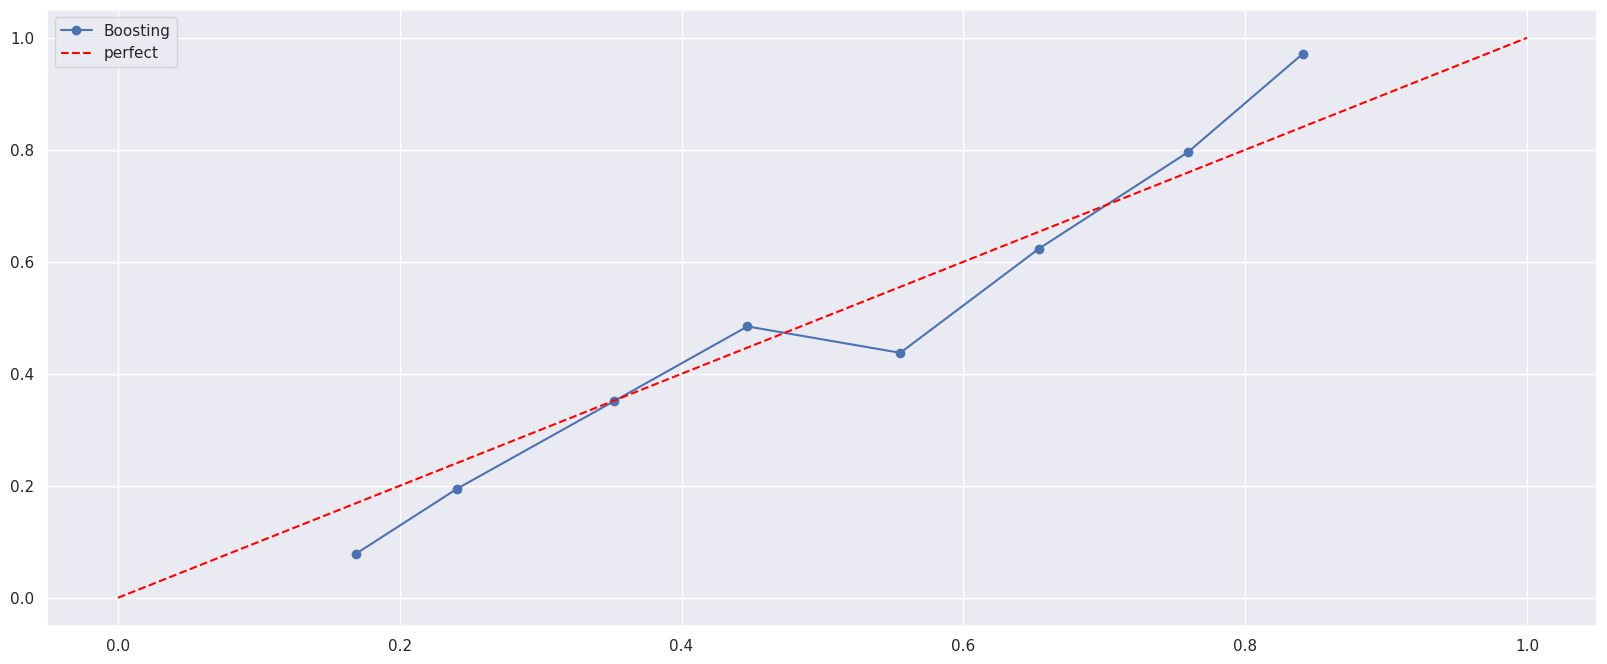

In [16]:
boosting_probs = gb_best.predict_proba(x_test)
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, boosting_probs[:, 1], n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='Boosting')
show_perfect_line()

Можно сказать, что модель достаточно хорошо оценивает вероятности, кривая идет лишь с небольшими отклонениями.

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_probs = log_reg.predict_proba(x_test)

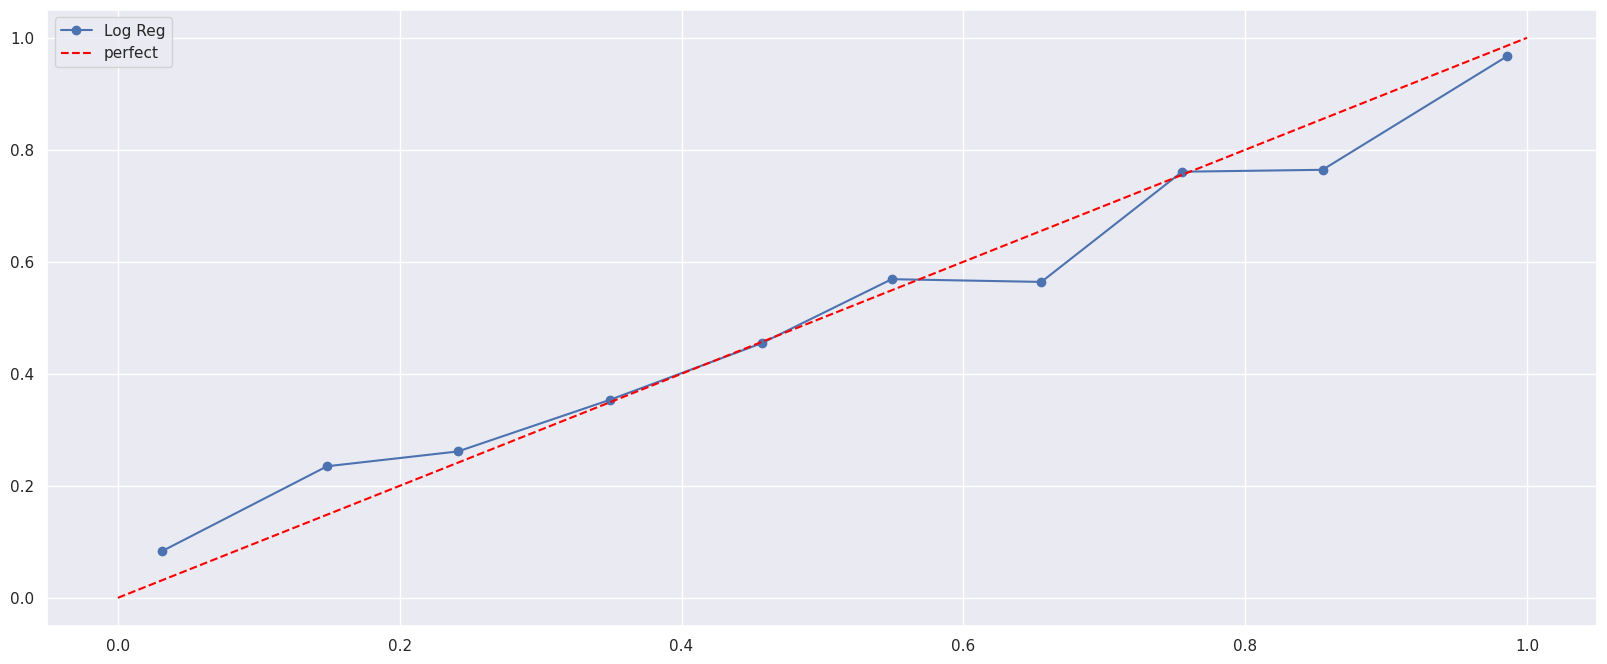

In [19]:
fraction_of_positives_log_reg, mean_predicted_value_log_reg = calibration_curve(y_test, log_reg_probs[:, 1], n_bins=10)
plt.plot(mean_predicted_value_log_reg, fraction_of_positives_log_reg, marker='o', label='Log Reg')
show_perfect_line()

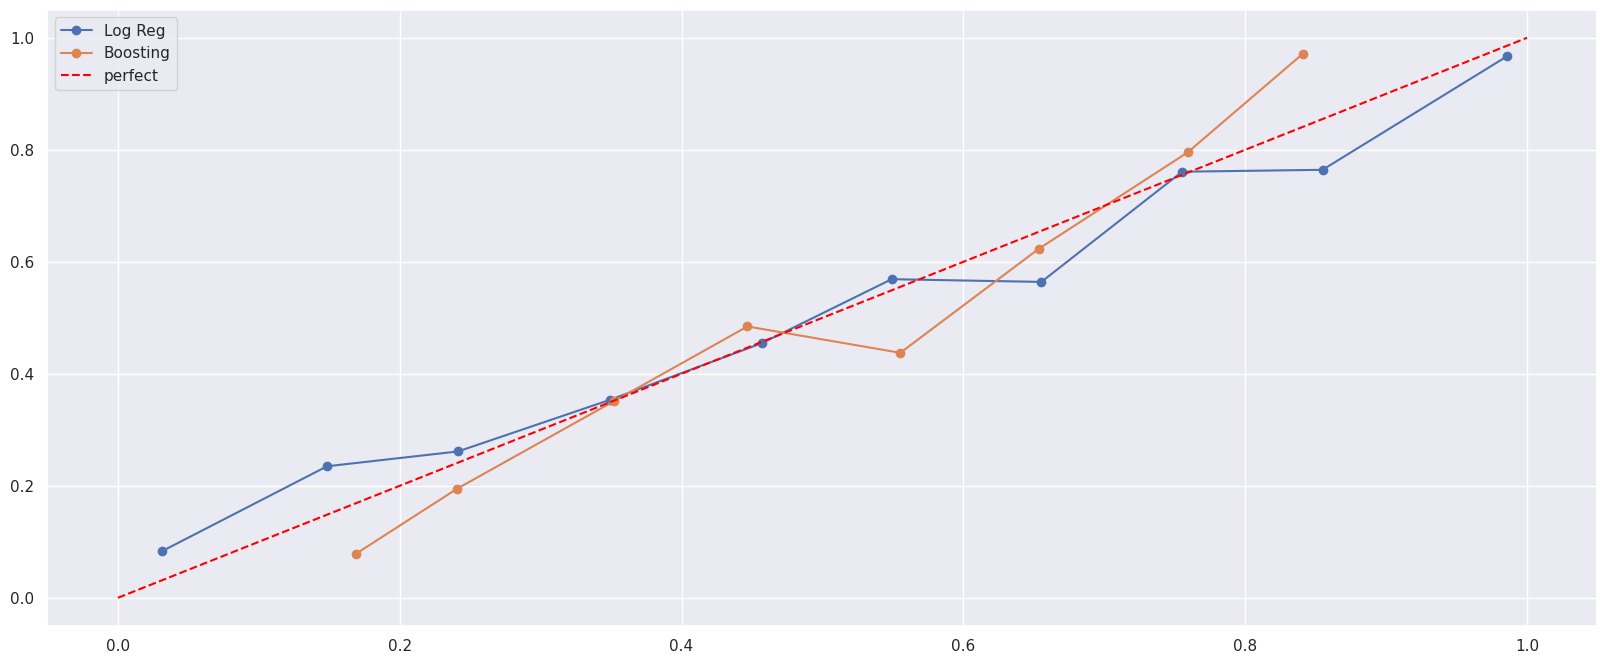

In [20]:
fig, ax = plt.subplots()

ax.plot(mean_predicted_value_log_reg, fraction_of_positives_log_reg, marker='o', label='Log Reg')
ax.plot(mean_predicted_value, fraction_of_positives, marker='o', label='Boosting')
ax.legend()
show_perfect_line()

plt.show()

В целом, и логистическая регрессия, и бустинг неплохо справились, однако кажется бустинг справился лучше. Он постоянно обновляется, чтобы улучшить свои прогнозы с помощью градиентов.

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

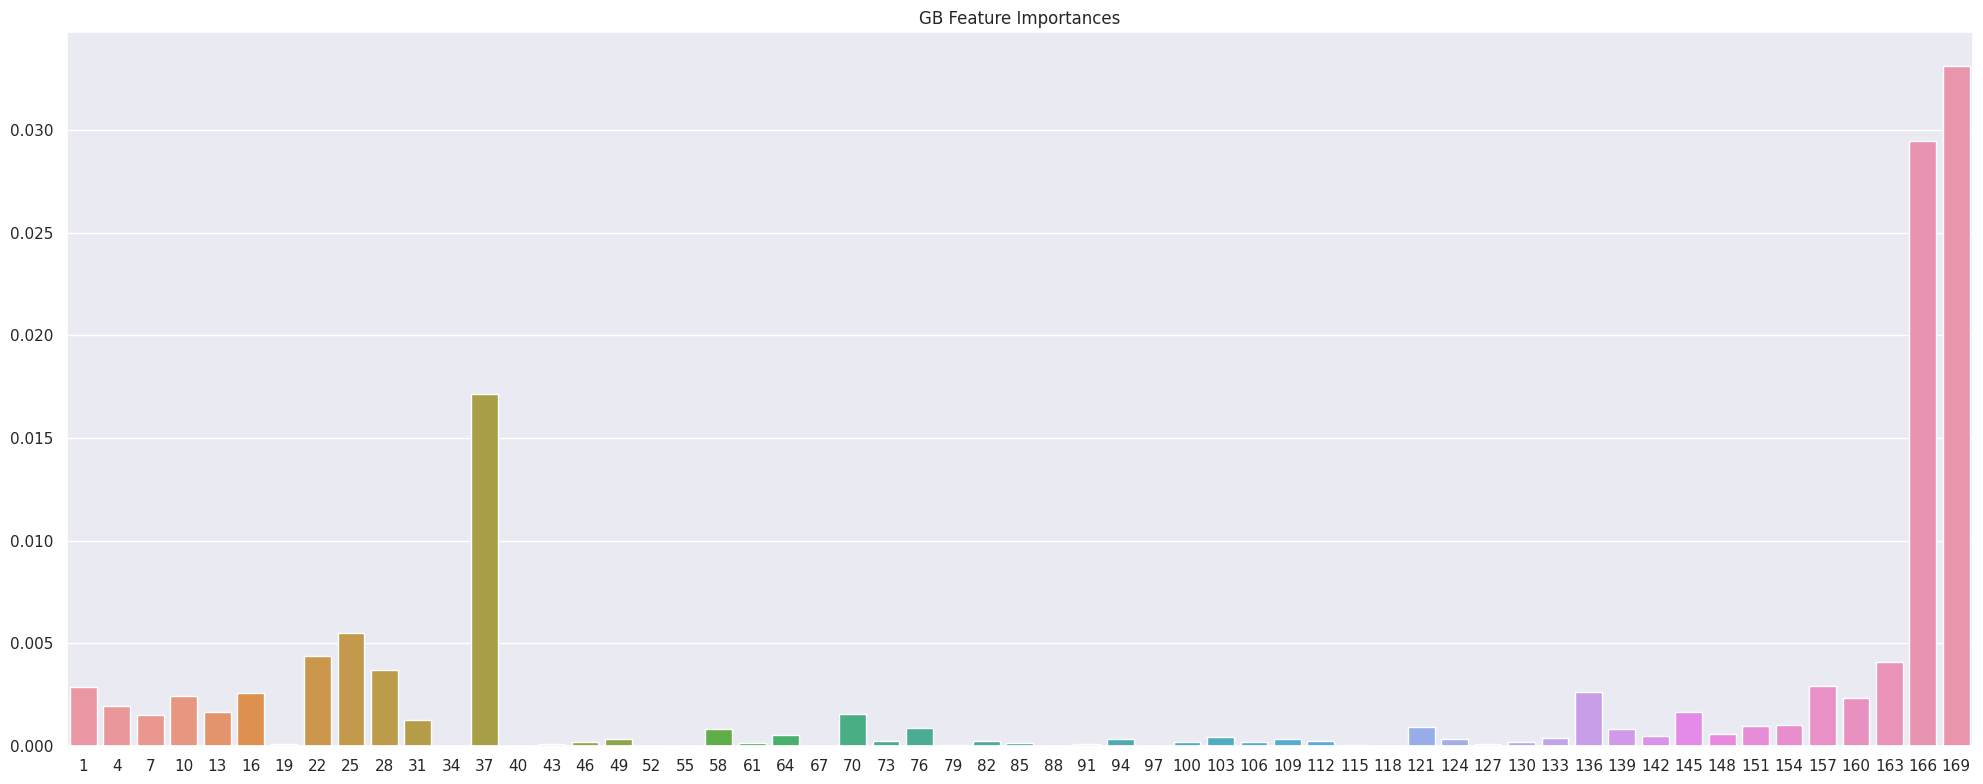

In [21]:
# YOUR CODE:
gb_importances = gb_best.feature_importances_
k = 3
selected_indices = np.arange(0, len(gb_importances), k)
sns.barplot(x=selected_indices + 1, y=gb_importances[selected_indices]).set_title('GB Feature Importances')
plt.tight_layout()
plt.show()

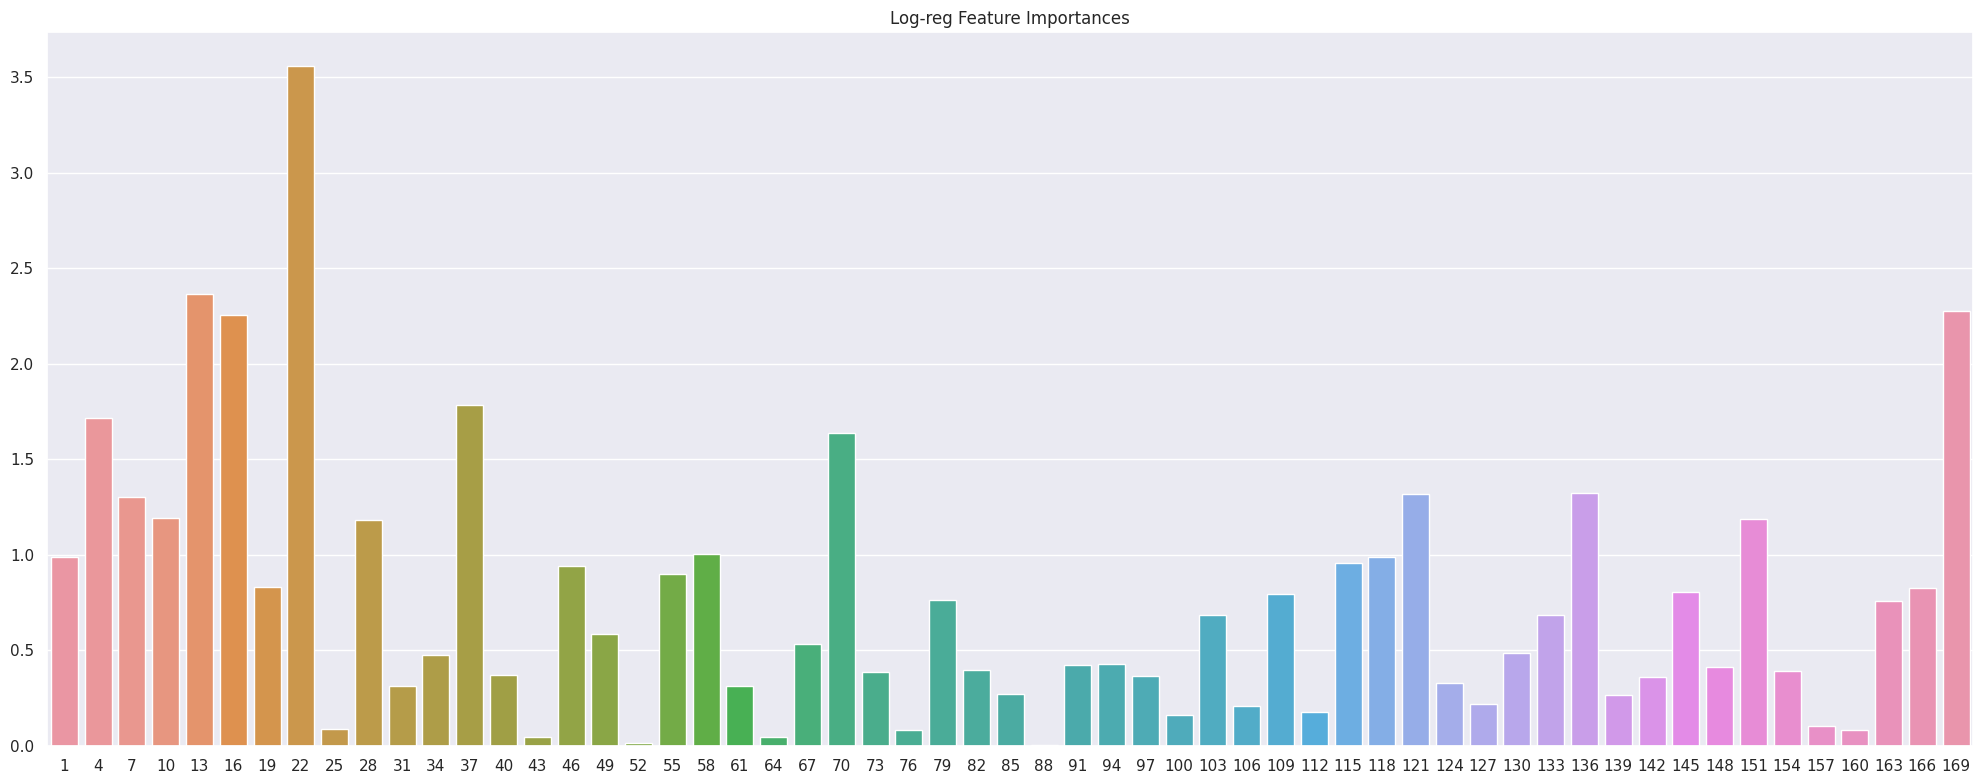

In [22]:
log_reg_importances = np.abs(log_reg.coef_[0])
k = 3
selected_indices = np.arange(0, len(log_reg_importances), k)
sns.barplot(x=selected_indices + 1, y=log_reg_importances[selected_indices]).set_title('Log-reg Feature Importances')
plt.tight_layout()
plt.show()

Из графиков видно, что бустинг отдает приоритет лишь нескольким признакам, в то время как логистическая регрессия, скажем так, "размазывается" и учитывает почти все признаки. Когда бустинг обнаруживает, что какой-то признак является важным для прогнозирования, он увеличивает вес этого признака.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [23]:
# YOUR CODE:
threshold = 0.00001
selected_features = np.where(gb_importances > threshold)[0]

In [24]:
gb_best_new = Boosting(
    n_estimators=params.get('n_estimators'),
    learning_rate=params.get('learning_rate'),
    subsample=params.get('subsample'),
    base_model_params={'max_depth': params.get('max_depth'),
                       'min_samples_split': params.get('min_samples_split'),
                       'min_samples_leaf': params.get('min_samples_leaf')
                       }
)

In [25]:
gb_best_new.fit(x_train[:, selected_features], y_train, x_valid[:, selected_features], y_valid)
gb_best_new.score(x_valid[:, selected_features], y_valid)

0.9408803886870796

Потыкав пороги, получилось слегка улучшить качество.

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [26]:
# YOUR CODE:

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [27]:
# YOUR CODE:
!pip install catboost
from catboost import CatBoostClassifier, Pool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score
from catboost import CatBoost

In [29]:
param = {'iterations': 50}

catboost_model = CatBoost(param)
train_pool = Pool(x_train, y_train)
catboost_model.fit(train_pool)
test_pool = Pool(x_test, y_test)
preds_proba = catboost_model.predict(test_pool, prediction_type='Probability')

accuracy_catboost = roc_auc_score(y_test, preds_proba[:, 1])
print(f'Accuracy (CatBoost): {accuracy_catboost}')

Learning rate set to 0.5
0:	learn: 0.7246796	total: 51.3ms	remaining: 2.51s
1:	learn: 0.6392696	total: 55ms	remaining: 1.32s
2:	learn: 0.5978990	total: 59ms	remaining: 924ms
3:	learn: 0.5771787	total: 63.2ms	remaining: 726ms
4:	learn: 0.5657193	total: 67.3ms	remaining: 606ms
5:	learn: 0.5588248	total: 71.5ms	remaining: 524ms
6:	learn: 0.5533608	total: 75.5ms	remaining: 464ms
7:	learn: 0.5493882	total: 79.6ms	remaining: 418ms
8:	learn: 0.5450381	total: 83.6ms	remaining: 381ms
9:	learn: 0.5419698	total: 87.4ms	remaining: 350ms
10:	learn: 0.5394047	total: 91.4ms	remaining: 324ms
11:	learn: 0.5363796	total: 95.2ms	remaining: 302ms
12:	learn: 0.5335807	total: 99.4ms	remaining: 283ms
13:	learn: 0.5313481	total: 103ms	remaining: 266ms
14:	learn: 0.5298517	total: 107ms	remaining: 249ms
15:	learn: 0.5270190	total: 111ms	remaining: 236ms
16:	learn: 0.5249026	total: 115ms	remaining: 223ms
17:	learn: 0.5225108	total: 119ms	remaining: 211ms
18:	learn: 0.5209852	total: 122ms	remaining: 200ms
19:	lea

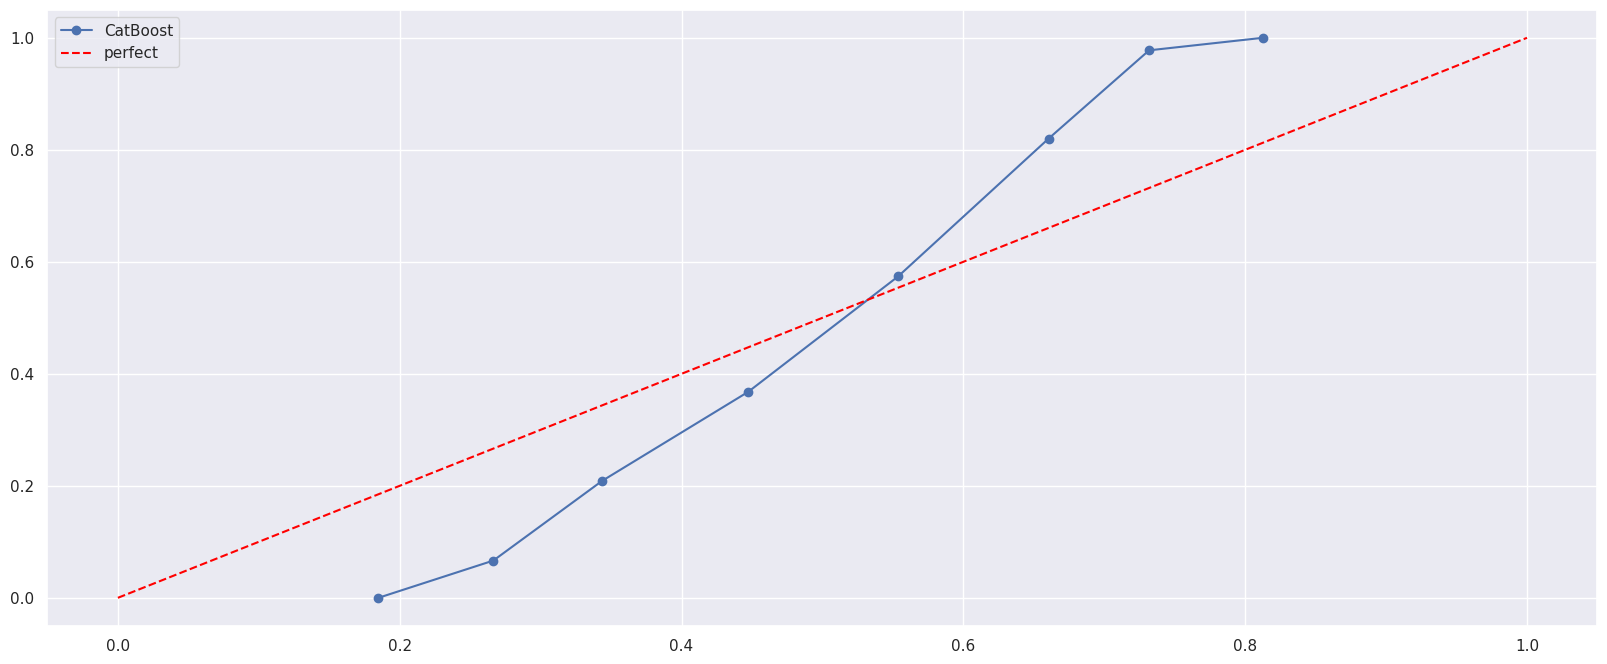

In [30]:
fraction_of_positives_catboost, mean_predicted_value_catboost = calibration_curve(y_test, preds_proba[:, 1], n_bins=10)
plt.plot(mean_predicted_value_catboost, fraction_of_positives_catboost, marker='o', label='CatBoost')
show_perfect_line()
plt.show()

Видим, что accuracy незначительно ниже, однако для ее получения потребовалось НАМНОГО меньше времени и все происходило автоматически, что наверное эффективнее.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

Хочешь рассмешить жизнь - расскажи ей о своих планах!

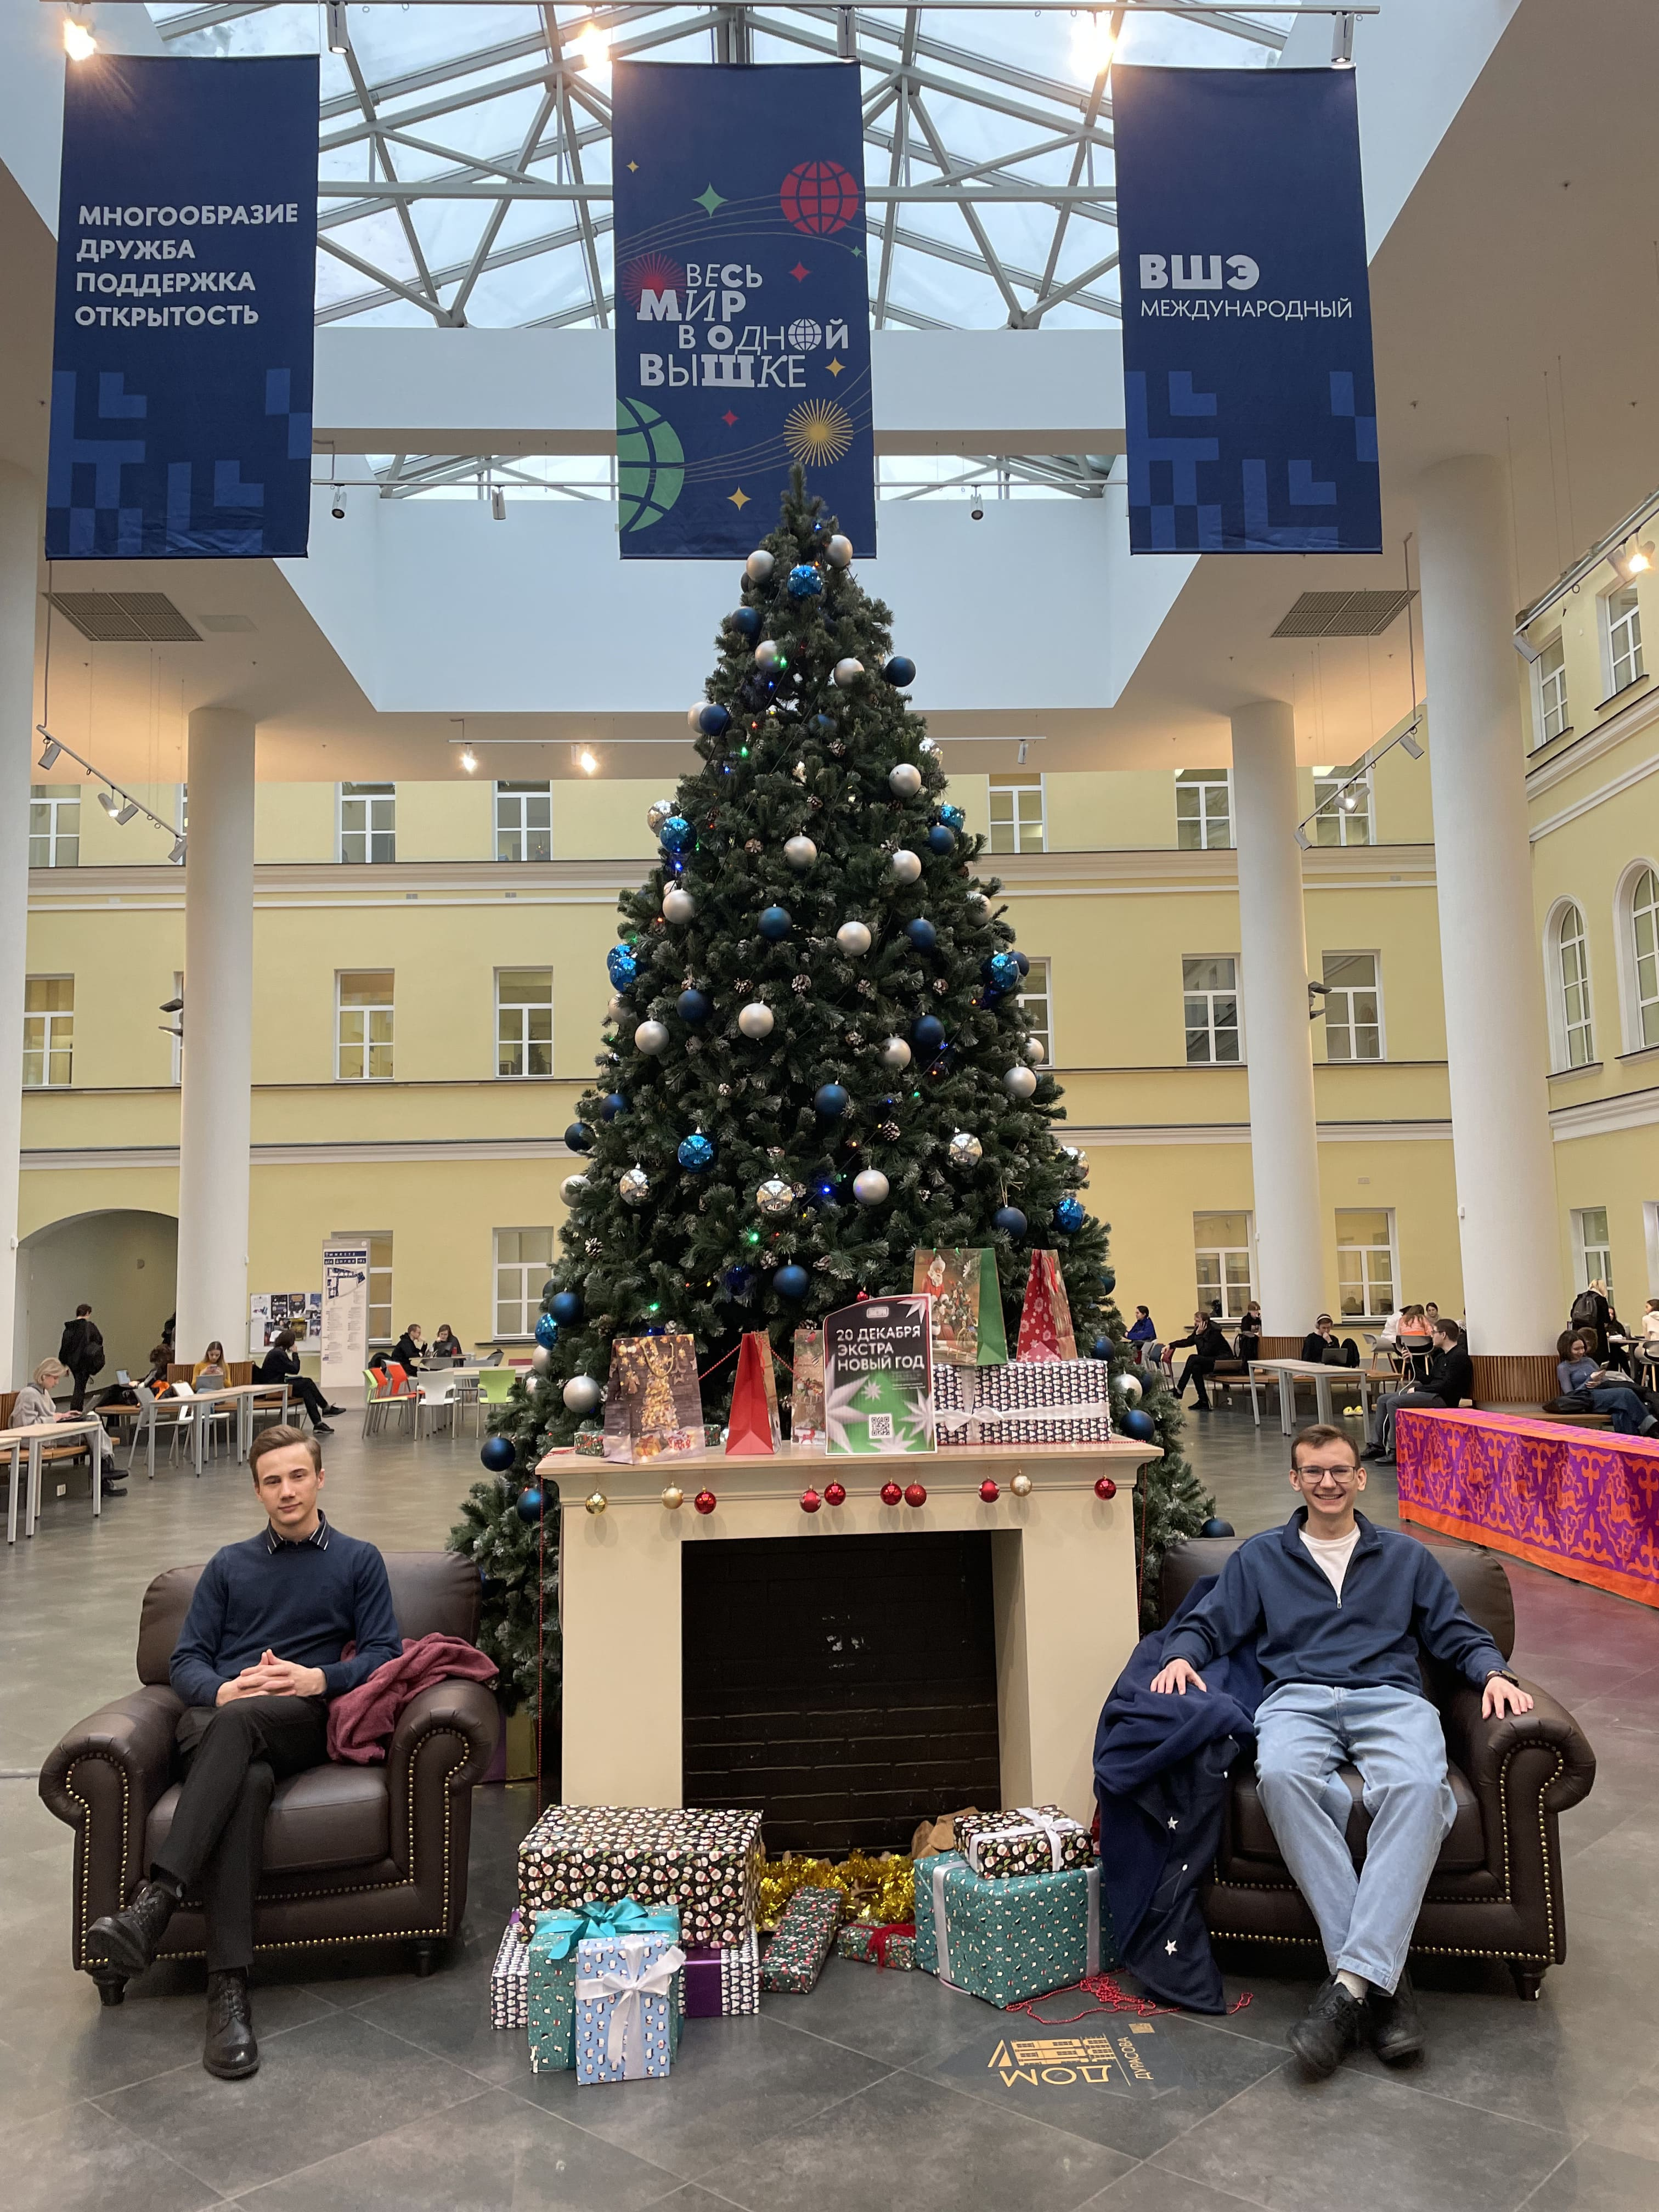